In [69]:
import math
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt
# import plotly
# import scipy
from sklearn.datasets import load_wine
from scipy.cluster.hierarchy import linkage, dendrogram

### Question 1

In [70]:
# Installing Pillow Libraries
!pip install scikit-learn matplotlib Pillow
import numpy as np
import os
from random import randrange
from matplotlib import pyplot as plt
from PIL import Image

In [71]:
cfw_dict = {
    'Amitabhbachan': 0,
    'AamirKhan': 1,
    'DwayneJohnson': 2,
    'AishwaryaRai': 3,
    'BarackObama': 4,
    'NarendraModi': 5,
    'ManmohanSingh': 6,
    'VladimirPutin': 7
}

opt = {
    'image_size': 32,
    'is_grayscale': False,
    'val_split': 0.75
}

In [72]:
def load_image(path):
    im = Image.open(path).convert('L' if opt['is_grayscale'] else 'RGB')
    im = im.resize((opt['image_size'],opt['image_size']))
    im = np.array(im)
    im = im/256
    return im

def display_images(imgs,classes,row=1,col=2,w=32,h=32):
    fig=plt.figure(figsize=(8, 8))
    for i in range(1, col*row +1):
        img = imgs[i-1]
        fig.add_subplot(row, col, i)
        
        if opt['is_grayscale']:
            plt.imshow(img , cmap='gray') 
        else:
            plt.imshow(img)
        
        plt.title("Class:{}".format(classes[i-1]))
        plt.axis('off')
    plt.show()

def load_data(dir_path):
    image_list = []
    y_list = []
    label_dict = cfw_dict
    for filename in sorted(os.listdir(dir_path)):
        if filename.endswith(".png"):
            im = load_image(os.path.join(dir_path,filename))
            y = filename.split('_')[0]
            y = label_dict[y] 
            image_list.append(im)
            y_list.append(y)
        else:
            continue
    image_list = np.array(image_list)
    y_list = np.array(y_list)
    print("Dataset shape:",image_list.shape)
    print("Label shape:",y_list.shape)

    return image_list,y_list

In [73]:
dirpath = 'SMAI-Dataset-release/IIIT-CFW/'
X,y = load_data(dirpath)
#rgb values

Dataset shape: (672, 32, 32, 3)
Label shape: (672,)


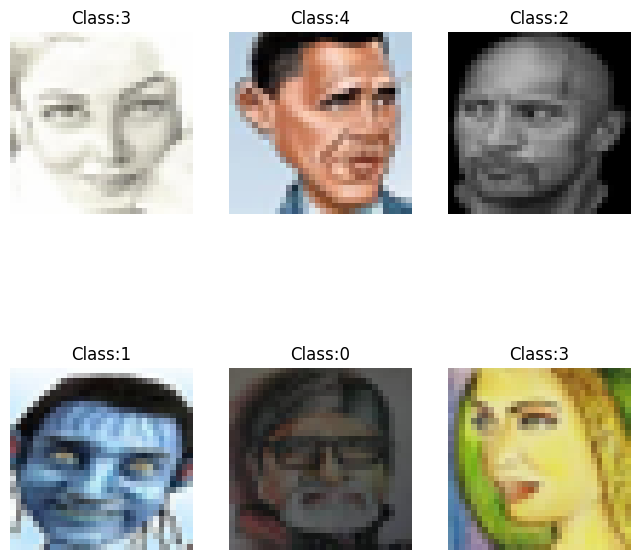

In [74]:
N,H,W = X.shape[0:3]
C = 1 if opt['is_grayscale'] else X.shape[3]

ind = np.random.randint(0,y.shape[0],6)
display_images(X[ind,...],y[ind], row=2,col=3)

In [75]:
print(X)
X.shape

[[[[0.00390625 0.         0.        ]
   [0.         0.00390625 0.00390625]
   [0.         0.01171875 0.015625  ]
   ...
   [0.0234375  0.046875   0.01171875]
   [0.02734375 0.0390625  0.0078125 ]
   [0.0234375  0.03515625 0.0078125 ]]

  [[0.         0.01171875 0.015625  ]
   [0.00390625 0.00390625 0.0078125 ]
   [0.0234375  0.0078125  0.01171875]
   ...
   [0.05859375 0.08984375 0.02734375]
   [0.05859375 0.08984375 0.02734375]
   [0.0546875  0.0859375  0.0234375 ]]

  [[0.0078125  0.015625   0.0234375 ]
   [0.015625   0.         0.00390625]
   [0.09375    0.0234375  0.015625  ]
   ...
   [0.09375    0.13671875 0.046875  ]
   [0.0859375  0.1328125  0.04296875]
   [0.08203125 0.1328125  0.04296875]]

  ...

  [[0.01171875 0.0078125  0.00390625]
   [0.19921875 0.10546875 0.06640625]
   [0.69140625 0.45703125 0.34375   ]
   ...
   [0.875      0.59765625 0.28125   ]
   [0.84765625 0.5703125  0.3125    ]
   [0.828125   0.55859375 0.34375   ]]

  [[0.3515625  0.203125   0.1171875 ]
   [0.6

(672, 32, 32, 3)

In [76]:
print(y)
y.shape

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 

(672,)

In [77]:
# Flatten each image and reshape the data into a 2D dataset
num_samples = X.shape[0]
X_2D = X.reshape(num_samples, -1)  # Flatten each image into a 1D vector and arrange as rows
# Print the shape of the resulting 2D dataset
print("Shape of the 2D dataset:", X_2D.shape)
X_2D

Shape of the 2D dataset: (672, 3072)


array([[0.00390625, 0.        , 0.        , ..., 0.859375  , 0.578125  ,
        0.27734375],
       [0.00390625, 0.        , 0.08203125, ..., 0.28515625, 0.24609375,
        0.27734375],
       [0.9765625 , 0.98046875, 0.9609375 , ..., 0.64453125, 0.8203125 ,
        0.45703125],
       ...,
       [0.95703125, 0.7421875 , 0.54296875, ..., 0.9921875 , 0.99609375,
        0.9765625 ],
       [0.96484375, 0.98046875, 0.28125   , ..., 0.50390625, 0.51171875,
        0.19140625],
       [0.796875  , 0.8203125 , 0.8046875 , ..., 0.2109375 , 0.44140625,
        0.52734375]])

In [78]:
# mean Centering the data  
X_mean = X_2D - np.mean(X_2D , axis = 0)
X_mean

array([[-0.7367234 , -0.73778716, -0.72834124, ...,  0.19483003,
        -0.05858212, -0.32772391],
       [-0.7367234 , -0.73778716, -0.64630999, ..., -0.37938872,
        -0.39061337, -0.32772391],
       [ 0.23593285,  0.24268159,  0.23259626, ..., -0.02001372,
         0.18360538, -0.14803641],
       ...,
       [ 0.2164016 ,  0.00440034, -0.18537249, ...,  0.32764253,
         0.35938663,  0.37149484],
       [ 0.2242141 ,  0.24268159, -0.44709124, ..., -0.16063872,
        -0.12498837, -0.41366141],
       [ 0.05624535,  0.08252534,  0.07634626, ..., -0.45360747,
        -0.19530087, -0.07772391]])

In [79]:
# Calculate the covariance matrix
cov_mat = np.cov(X_mean, rowvar=False)

# Print the shape of the covariance matrix
print("Shape of the covariance matrix:", cov_mat.shape)
print(cov_mat)

Shape of the covariance matrix: (3072, 3072)
[[0.09416836 0.08631895 0.08103604 ... 0.04221782 0.04142305 0.0425173 ]
 [0.08631895 0.0962554  0.09226675 ... 0.04173321 0.04545413 0.04559659]
 [0.08103604 0.09226675 0.10146832 ... 0.04163747 0.04461936 0.04981359]
 ...
 [0.04221782 0.04173321 0.04163747 ... 0.09629671 0.08793316 0.08208861]
 [0.04142305 0.04545413 0.04461936 ... 0.08793316 0.09772433 0.09532329]
 [0.0425173  0.04559659 0.04981359 ... 0.08208861 0.09532329 0.10708641]]


In [80]:
#Calculating Eigenvalues and Eigenvectors of the covariance matrix
eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)

In [81]:
#sort the eigenvalues in descending order
sorted_index = np.argsort(eigen_values)[::-1]
sorted_eigenvalue = eigen_values[sorted_index]
#similarly sort the eigenvectors 
sorted_eigenvectors = eigen_vectors[:,sorted_index]

In [82]:
# select the first n eigenvectors, n is desired dimension
# of our final reduced data.
n_components = 2 #you can select any number of components.
eigenvector_subset = sorted_eigenvectors[:,0:n_components]

In [83]:
# #Transform the data 
# X_reduced = np.dot(eigenvector_subset.transpose(),X_mean.transpose()).transpose()
# Flatten the last three dimensions of X_mean
# X_mean_flat = X_mean.reshape(X_mean.shape[0], -1)

# Transform the data 
X_reduced = np.dot(eigenvector_subset.transpose(), X_mean.transpose()).transpose()
# Print the shape of the reduced data
print("Shape of the reduced data:", X_reduced.shape)
# print(X_reduced)

Shape of the reduced data: (672, 2)


### Part 1.1(2)

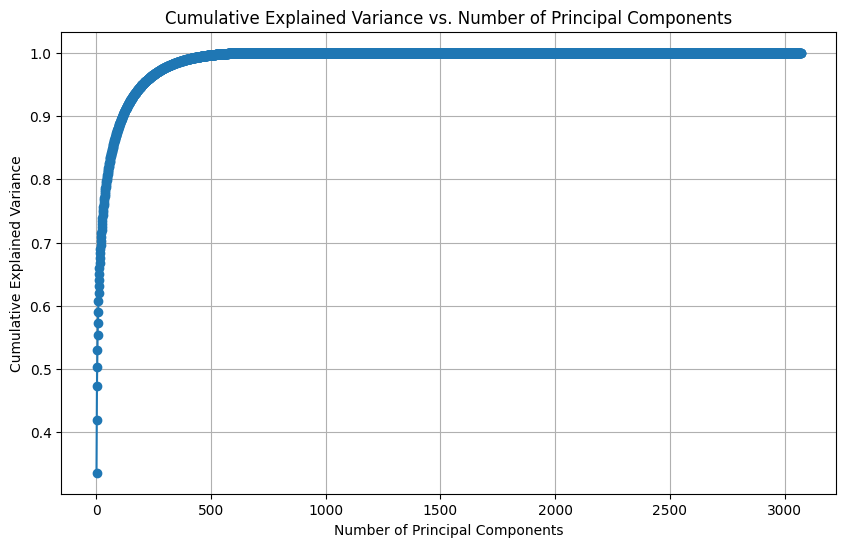

In [84]:
# Calculate the cumulative explained variance
cumulative_variance = np.cumsum(sorted_eigenvalue) / np.sum(sorted_eigenvalue)

# Plot the cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Principal Components')
plt.grid(True)
plt.show()


### Part 1.1(3)

In [85]:
data = np.load('pictionary_dataset.npy', allow_pickle=True)

In [86]:
df = pd.DataFrame(data)
df

,0,1,2,3,4
0,9f894201-9d0d-4f75-853b-595c0c1bd661,"[[-0.001002429, 0.047839083, -0.0046581626, 0....","[[0.31094703, 0.20213455, -0.16519593, -0.0530...",sleep,33.144312
1,d2b4d879-0345-4df1-a978-eb7f9e8b89f1,"[[-0.013190677, 0.08283211, 0.006474074, 0.001...","[[-0.07832227, -0.07557866, -0.05214904, -0.32...",oven,98.512848
2,aaf0c209-f3a7-4c91-9a09-bc1e30400c4c,"[[-0.010499587, 0.047467805, -0.019303396, -0....","[[0.31455985, -0.024428558, 0.33139282, 0.2197...",chair,15.449425
3,5ae313c7-9934-456c-9685-36ef20b712fd,"[[-0.023966337, 0.024375185, -0.0009961016, -0...","[[0.113364324, -0.23683439, 0.34781978, -0.427...",igloo,43.358541
4,b58bbb2c-461f-4805-856e-cba323f97e8c,"[[-0.018555297, 0.050565578, -0.008821793, 0.0...","[[0.22332864, -0.28626534, -0.037617087, -0.17...",fish,14.454734
...,...,...,...,...,...
1495,b1233fbb-68ee-44a0-a8b8-0b399ad1cacd,"[[0.009528579, 0.044194497, 0.038498692, -0.00...","[[0.10134661, -0.10768638, 0.23218037, 0.25022...",stove,53.772519
1496,76c1ee48-25b4-4981-b21f-26a3a2b091bb,"[[-0.003666563, 0.028779637, -0.013404611, -0....","[[0.29125518, -0.18452865, 0.1506041, 0.092724...",carrot,18.516855
1497,9596177d-b182-486e-bbc9-987081647e68,"[[0.00709543, 0.037197262, -0.022390455, 0.001...","[[0.19752023, 0.29306346, -0.28130922, -0.3879...",puppet,94.686575
1498,9ad40994-3c3b-46c0-81b4-05e81589856d,"[[0.009601502, 0.03150965, -0.010726368, 0.000...","[[0.3255903, -0.14218077, 0.0856628, 0.4351619...",listen,25.308092


In [87]:
df = df.iloc[:, [2]]
print(df)

                                                      2
0     [[0.31094703, 0.20213455, -0.16519593, -0.0530...
1     [[-0.07832227, -0.07557866, -0.05214904, -0.32...
2     [[0.31455985, -0.024428558, 0.33139282, 0.2197...
3     [[0.113364324, -0.23683439, 0.34781978, -0.427...
4     [[0.22332864, -0.28626534, -0.037617087, -0.17...
...                                                 ...
1495  [[0.10134661, -0.10768638, 0.23218037, 0.25022...
1496  [[0.29125518, -0.18452865, 0.1506041, 0.092724...
1497  [[0.19752023, 0.29306346, -0.28130922, -0.3879...
1498  [[0.3255903, -0.14218077, 0.0856628, 0.4351619...
1499  [[0.323996, 0.3701325, 0.53706473, -0.02763263...

[1500 rows x 1 columns]


In [88]:
print(type(df))
numpy_data = df.values

<class 'pandas.core.frame.DataFrame'>


In [89]:
numpy_data.shape

(1500, 1)

In [122]:
# Extract the features from the DataFrame
features = df.values

# Reshape the data to have samples as rows and features as columns
X = np.vstack(features)

# Mean centering the data
X_mean = X - np.mean(X, axis=0)

# Calculate the covariance matrix
cov_mat = np.cov(X_mean, rowvar=False)

# Calculate eigenvalues and eigenvectors
eigen_values, eigen_vectors = np.linalg.eigh(cov_mat)
sorted_index = np.argsort(eigen_values)[::-1]
sorted_eigenvalues = eigen_values[sorted_index]
sorted_eigenvectors = eigen_vectors[:, sorted_index]

# Select the desired number of components (2 in this case)
n_components = 5
eigenvector_subset = sorted_eigenvectors[:, :n_components]

# Project the data onto the selected eigenvectors
X_reduced = np.dot(eigenvector_subset.transpose(), X_mean.transpose()).transpose()

# Print the shape of the reduced data
print("Shape of the reduced data:", X_reduced.shape)
# print(X_reduced)

Shape of the reduced data: (178, 5)


In [123]:
from sklearn.neighbors import KNeighborsClassifier

# Train a k-NN classifier on the reduced dataset
knn_classifier_reduced = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors (k) as needed
knn_classifier_reduced.fit(X_train_reduced, y_train)

KNeighborsClassifier()

In [ ]:
from sklearn.metrics import accuracy_score

# Predictions using k-NN classifier
y_pred_knn_reduced = knn_classifier_reduced.predict(X_test_reduced)

# Compute accuracy using the k-NN classifier on the reduced dataset
accuracy_knn_reduced = accuracy_score(y_test, y_pred_knn_reduced)
print("Accuracy using k-NN on the reduced dataset:", accuracy_knn_reduced)


### Calculating KNN for the dataset using inbuilt classifier - Part 1.1 (4)

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Flatten the images and preprocess the data
num_samples = X.shape[0]
X_2D = X.reshape(num_samples, -1)
X_2D_normalized = StandardScaler().fit_transform(X_2D)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_2D_normalized, y, test_size=0.2, random_state=42)

# Train the KNN model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Test the KNN model
y_pred = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.35555555555555557


In [91]:
# Flatten the images and preprocess the reduced data
X_reduced_flattened = X_reduced.reshape(X_reduced.shape[0], -1)

# Split the data into training and testing sets
X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = train_test_split(
    X_reduced_flattened, y, test_size=0.2, random_state=42
)

# Train the KNN model
knn_reduced = KNeighborsClassifier(n_neighbors=5)
knn_reduced.fit(X_train_reduced, y_train_reduced)

# Test the KNN model
y_pred_reduced = knn_reduced.predict(X_test_reduced)

# Calculate accuracy
accuracy_reduced = accuracy_score(y_test_reduced, y_pred_reduced)
print("Accuracy with reduced data:", accuracy_reduced)

Accuracy with reduced data: 0.3111111111111111


In [92]:
# Define a function to calculate accuracy for a given number of components
def calculate_accuracy(X_train, X_test, y_train, y_test, n_components=None):
    if n_components is not None:
        # Select the first n_components eigenvectors
        eigenvector_subset = sorted_eigenvectors[:, :n_components]
        X_train_reduced = np.dot(eigenvector_subset.T, X_train.T).T
        X_test_reduced = np.dot(eigenvector_subset.T, X_test.T).T
    else:
        X_train_reduced, X_test_reduced = X_train, X_test
    
    # Train the KNN model
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train_reduced, y_train)
    
    # Test the KNN model
    y_pred = knn.predict(X_test_reduced)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Vary the number of components from 1 to n
num_features = X_2D.shape[1]
accuracy_per_component = []

for n_components in range(1, num_features + 1):
    accuracy = calculate_accuracy(X_train, X_test, y_train, y_test, n_components=n_components)
    accuracy_per_component.append(accuracy)

# Plot accuracy vs. number of components
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_features + 1), accuracy_per_component, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Principal Components')
plt.grid(True)
plt.show()

KeyboardInterrupt: 

### Question 1.2

In [124]:
import pandas as pd

# Load CSV file into a DataFrame
df = pd.read_csv('drawer_attributes.csv')

# Access data in the DataFrame
print(df.head())  # Display the first few rows


   d_drawer  d_area_median  d_stroke_freq_median  d_rangestroketime_median  \
0        10       0.000000              0.000000                     0.000   
1        36   82306.749763              0.578802                    21.660   
2        14   60929.328432              0.239168                    25.087   
3        26  119037.637976              0.402533                    54.162   
4        40       0.000000              0.000000                     0.000   

   d_firststroketime_median  d_laststroketime_median  d_pcgamestup  \
0                     0.000                    0.000          0.00   
1                     3.512                   26.815          0.00   
2                     1.368                   26.455          1.00   
3                     2.459                   56.621          0.75   
4                     0.000                    0.000          0.00   

   d_pcgamestdown  d_pcgameserasehighlight  
0             0.0                 0.000000  
1             0.0   

In [128]:
import numpy as np

# Load your data into a NumPy array
# Assuming your data is in a DataFrame called 'df'
features = df.values

# Separate your dataset into features and labels if needed
# Assuming the first column is 'd_drawer' and the rest are features
labels = features[:, 0]
X = features[:, 1:]

# Mean centering the data
X_mean = X - np.mean(X, axis=0)

# Calculate the covariance matrix
cov_mat = np.cov(X_mean, rowvar=False)

# Calculate eigenvalues and eigenvectors
eigen_values, eigen_vectors = np.linalg.eigh(cov_mat)
sorted_index = np.argsort(eigen_values)[::-1]
sorted_eigenvalues = eigen_values[sorted_index]
sorted_eigenvectors = eigen_vectors[:, sorted_index]

# Select the desired number of components (5 in this case)
n_components = 3
eigenvector_subset = sorted_eigenvectors[:, :n_components]

# Project the data onto the selected eigenvectors
X_reduced = np.dot(eigenvector_subset.transpose(), X_mean.transpose()).transpose()

# Print the shape of the reduced data
print("Shape of the reduced data:", X_reduced.shape)


Shape of the reduced data: (100, 3)


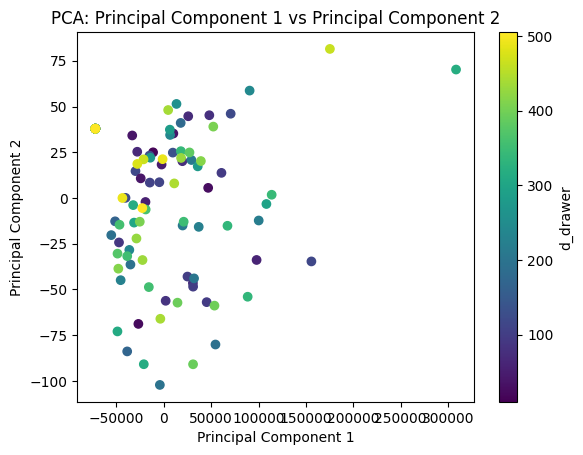

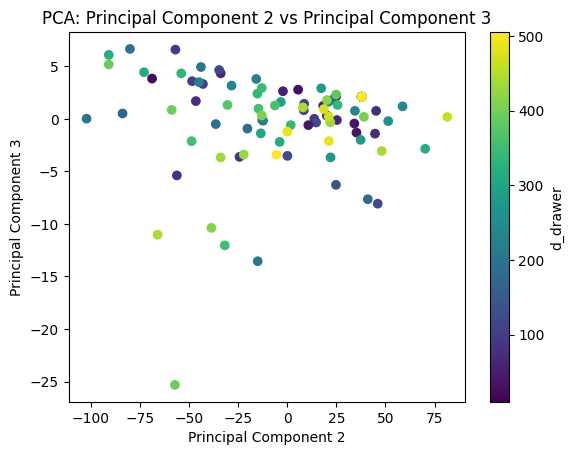

In [129]:
import matplotlib.pyplot as plt

# Scatter plot for the first pair of principal components
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=labels, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: Principal Component 1 vs Principal Component 2')
plt.colorbar(label='d_drawer')
plt.show()
plt.scatter(X_reduced[:, 1], X_reduced[:, 2], c=labels, cmap='viridis')
plt.xlabel('Principal Component 2')
plt.ylabel('Principal Component 3')
plt.title('PCA: Principal Component 2 vs Principal Component 3')
plt.colorbar(label='d_drawer')
plt.show()

Each new axis (principal component) obtained from PCA represents a linear combination of the original features. The first principal component (PC1) represents the direction of maximum variance in the data. Subsequent components (PC2, PC3, and so on) represent directions of maximum variance that are orthogonal (uncorrelated) to the previous components.

In the context of your specific dataset, where the original features are related to drawing activities ('d_drawer', 'd_area_median', 'd_stroke_freq_median', etc.), each principal component is a weighted combination of these original features that captures a certain pattern or structure in the data.

To understand what each principal component represents in terms of the original features, you can look at the weights (coefficients) of the original features in the principal component. The higher the absolute value of a weight for a specific original feature, the more that feature contributes to that principal component.

For example, if in the first principal component (PC1), the weight for 'd_area_median' is very high compared to other features, it suggests that PC1 represents a pattern related to the median area of drawings. Similarly, you can interpret the other principal components based on the weights of the original features.

Keep in mind that the interpretation of principal components depends on the context of your data and the specific domain you are working with. It's often a good practice to consult with domain experts to interpret the principal components accurately.

### Guesser Dataset

In [130]:
import pandas as pd

# Load CSV file into a DataFrame
df = pd.read_csv('guesser_attributes.csv')

# Access data in the DataFrame
print(df.head())  # Display the first few rows


   g_guesser  g_noofmessage_median  g_firstmessagetime_median  \
0         10                   0.0                   0.000000   
1         36                   1.0                  25.367172   
2         14                   2.0                  12.988740   
3         26                   3.5                  20.622346   
4         40                   3.0                  30.339558   

   g_lastmessagetime_median  g_rangemessagetime_median  g_pcgamesconfusion  \
0                  0.000000                   0.000000                 0.0   
1                 39.041594                   0.000000                 0.0   
2                 51.351317                  38.362577                 1.0   
3                 64.718058                  44.095712                 0.0   
4                 78.943003                  48.603445                 0.0   

   g_entropy  
0   0.000000  
1   0.000000  
2   0.693147  
3   1.242453  
4   1.098612  


In [131]:
import numpy as np

# Load your data into a NumPy array
# Assuming your data is in a DataFrame called 'df'
features = df.values

# Separate your dataset into features and labels if needed
# Assuming the first column is 'g_guesser' and the rest are features
labels = features[:, 0]
X = features[:, 1:]

# Mean centering the data
X_mean = X - np.mean(X, axis=0)

# Calculate the covariance matrix
cov_mat = np.cov(X_mean, rowvar=False)

# Calculate eigenvalues and eigenvectors
eigen_values, eigen_vectors = np.linalg.eigh(cov_mat)
sorted_index = np.argsort(eigen_values)[::-1]
sorted_eigenvalues = eigen_values[sorted_index]
sorted_eigenvectors = eigen_vectors[:, sorted_index]

# Select the desired number of components (3 in this case)
n_components = 3
eigenvector_subset = sorted_eigenvectors[:, :n_components]

# Project the data onto the selected eigenvectors
X_reduced = np.dot(eigenvector_subset.transpose(), X_mean.transpose()).transpose()

# Print the shape of the reduced data
print("Shape of the reduced data:", X_reduced.shape)


Shape of the reduced data: (100, 3)


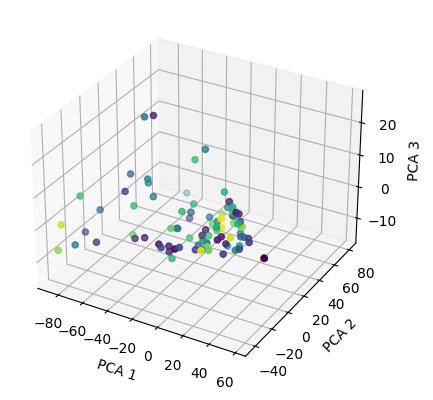

In [132]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming X_reduced contains the PCA reduced data
# X_reduced should be a 2D array with shape (number_of_samples, 3)
# If not, modify X_reduced accordingly

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Extract components for the 3 axes
x = X_reduced[:, 0]
y = X_reduced[:, 1]
z = X_reduced[:, 2]

# Plot the points
ax.scatter(x, y, z, c=labels, cmap='viridis')

# Set labels for the axes
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')

# Show the plot
plt.show()


In PCA (Principal Component Analysis), the new axes, or principal components, are linear combinations of the original features. Each principal component is a direction in the feature space that captures the maximum variance in the data.

The first principal component (PC1) represents the direction of maximum variance in the data. It accounts for the most significant source of variability in the dataset. PC1 is chosen in such a way that the projection of the data onto this axis has the highest variance.

The second principal component (PC2) is orthogonal to the first one and represents the direction of the next highest variance that is not captured by PC1. It provides a complementary source of variance, and together with PC1, it forms a plane in the feature space.

The third principal component (PC3) is orthogonal to both PC1 and PC2 and represents the direction of the next highest variance not captured by PC1 and PC2. Similarly, higher-order principal components represent subsequent directions of decreasing variance.

In summary, each principal component represents a direction in the feature space along which the data varies the most. By projecting the data onto these axes, we transform the original features into a new set of uncorrelated variables (principal components) that capture the maximum variance in the dataset. This transformation allows for dimensionality reduction while preserving the essential structure and patterns of the data.

### Question 2

#### 2.1

In [93]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [94]:
#importing the customer dataset
cust_dataset = pd.read_csv('SMAI-Dataset-customer-dataset/data.csv')
df = pd.DataFrame(cust_dataset)
numerical_cols = ['Gender','Marital status','Age', 'Education', 'Income','Occupation','Settlement size']
for col in numerical_cols:
    x_min = df[col].min()
    x_max = df[col].max()
    df[col] = (df[col] - x_min) / (x_max - x_min)
normalized_data_np = df.values
normalized_data_np = np.delete(normalized_data_np, [0,1], axis=1)
normalized_data_np
print(df)

      Index  Gender  Marital status       Age  Education    Income  \
0         0     0.0             0.0  0.844828   0.666667  0.324781   
1         1     1.0             1.0  0.068966   0.333333  0.420210   
2         2     0.0             0.0  0.534483   0.333333  0.195144   
3         3     0.0             0.0  0.465517   0.333333  0.496223   
4         4     0.0             0.0  0.603448   0.333333  0.413842   
...     ...     ...             ...       ...        ...       ...   
1995   1995     1.0             0.0  0.500000   0.333333  0.320595   
1996   1996     1.0             1.0  0.155172   0.333333  0.299460   
1997   1997     0.0             0.0  0.224138   0.000000  0.184871   
1998   1998     1.0             1.0  0.103448   0.333333  0.227162   
1999   1999     0.0             0.0  0.120690   0.000000  0.119123   

      Occupation  Settlement size  
0            0.5              1.0  
1            0.5              1.0  
2            0.0              0.0  
3            0.

In [103]:
class GMM():
    def initializing(self, X, k):
        n, d = X.shape
        self.k = k
        self.means = X[np.random.choice(n, k, replace=False)]  # Randomly choose k data points as initial means
        self.cov = np.array([np.eye(d) for _ in range(k)])  # Initialize covariance matrices as identity
        self.weights = np.ones(k) / k  # Initialize equal weights for all components
        return None
    def multivariate_normal_pdf(self,x, mean, covariance):
        # Calculate the PDF of the multivariate normal distribution
        d = len(mean)
        diff = x - mean
        exponent = -0.5 * np.dot(diff.T, np.dot(np.linalg.inv(covariance), diff))
        pdf_value = (1.0 / ((2 * np.pi) ** (d / 2) * np.sqrt(np.linalg.det(covariance)))) * np.exp(exponent)
        return pdf_value
    def calculate_responsibilities(self,X):
        means=self.means
        covariances=self.cov
        weights=self.weights
        k = len(means)
        n = X.shape[0]
        responsibilities = np.zeros((n, k))
        for i in range(n):
            for j in range(k):
                # Calculate PDF of data point i with component j using multivariate normal distribution
                pdf_value = self.multivariate_normal_pdf(X[i], means[j], covariances[j])
                responsibilities[i, j] = weights[j] * pdf_value

            # Normalize responsibilities for each data point
            responsibilities[i, :] /= np.sum(responsibilities[i, :])

        return responsibilities
    def reestimate_parameters(self,X, responsibilities):
        n, d = X.shape
        k = responsibilities.shape[1]

    # Update means
        means = np.zeros((k, d))
        for j in range(k):
            N_j = np.sum(responsibilities[:, j])
            means[j] = np.sum(responsibilities[:, j].reshape(-1, 1) * X, axis=0) / N_j

    # Update covariances
        covariances = np.zeros((k, d, d))
        for j in range(k):
            N_j = np.sum(responsibilities[:, j])
            diff = X - self.means[j]
            covariances[j] = np.dot((responsibilities[:, j].reshape(-1, 1) * diff).T, diff) / N_j
            covariances[j] += 1e-6 * np.eye(d)  
    # Update weights
        weights = np.sum(responsibilities, axis=0) / n
        self.means = means
        self.cov = covariances
        self.weights = weights
        # return means, covariances, weights
    def fit(self,X,iterations,k):
        loglikelihoods = [] 
        self.initializing(X, k)
        for i in range(iterations):
            responsibilities = self.calculate_responsibilities(X)
            self.reestimate_parameters(X, responsibilities)
            loglikelihoods.append(self.loglikelihood(X))
        return loglikelihoods
    def loglikelihood(self, X):
        n = X.shape[0]
        log_likelihood = 0.0
        for i in range(n):
            # Calculate the log-likelihood for each data point
            point_log_likelihood = np.log(np.sum(
                [self.weights[j] * self.multivariate_normal_pdf(X[i], self.means[j], self.cov[j]) for j in range(self.k)]))
            log_likelihood += point_log_likelihood

        return log_likelihood
        
# responsibilities = calculate_responsibilities(X, means, covariances, weights)


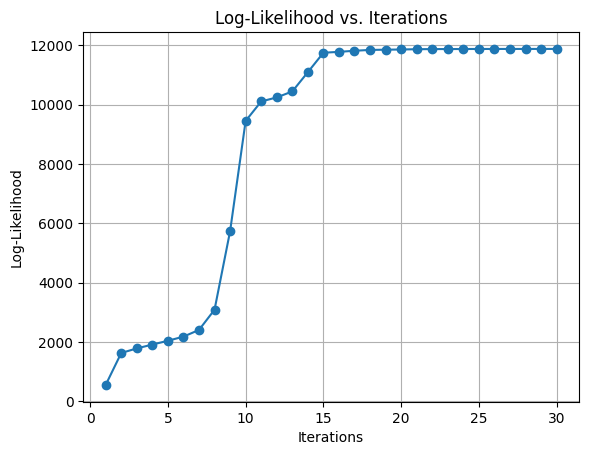

In [104]:
n_samples = 2000
n_features = 8
# X = np.random.rand(n_samples, n_features)  # Replace with your actual dataset
X = normalized_data_np
# Specify the number of components (k) for the Gaussian Mixture Model
k = 5  # Replace with the desired number of components
gmm_instance = GMM()
# gmm_instance.fit(X, iterations=30,k=7)
log_likelihoods = gmm_instance.fit(X, iterations=30, k=5)
plt.figure()
plt.plot(range(1, len(log_likelihoods) + 1), log_likelihoods, marker='o')
plt.xlabel('Iterations')
plt.ylabel('Log-Likelihood')
plt.title('Log-Likelihood vs. Iterations')
plt.grid(True)
plt.show()


#### 2.2

In [98]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn import metrics

wine_data=load_wine()
df=pd.DataFrame(wine_data.data,columns=wine_data.feature_names)
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [115]:
#modifying thr GMM Class to accomodate AIC and BIC
class GMM_modified():
    def initializing(self, X, k):
        n, d = X.shape
        self.k = k
        self.means = X[np.random.choice(n, k, replace=False)]  # Randomly choose k data points as initial means
        self.cov = np.array([np.eye(d) for _ in range(k)])  # Initialize covariance matrices as identity
        self.weights = np.ones(k) / k  # Initialize equal weights for all components
        return None
    def multivariate_normal_pdf(self,x, mean, covariance):
        # Calculate the PDF of the multivariate normal distribution
        d = len(mean)
        diff = x - mean
        exponent = -0.5 * np.dot(diff.T, np.dot(np.linalg.inv(covariance), diff))
        pdf_value = (1.0 / ((2 * np.pi) ** (d / 2) * np.sqrt(np.linalg.det(covariance)))) * np.exp(exponent)
        return pdf_value
    def calculate_responsibilities(self,X):
        means=self.means
        covariances=self.cov
        weights=self.weights
        k = len(means)
        n = X.shape[0]
        responsibilities = np.zeros((n, k))
        for i in range(n):
            for j in range(k):
                # Calculate PDF of data point i with component j using multivariate normal distribution
                pdf_value = self.multivariate_normal_pdf(X[i], means[j], covariances[j])
                responsibilities[i, j] = weights[j] * pdf_value

            # Normalize responsibilities for each data point
            responsibilities[i, :] /= np.sum(responsibilities[i, :])

        return responsibilities
    def reestimate_parameters(self,X, responsibilities):
        n, d = X.shape
        k = responsibilities.shape[1]

    # Update means
        means = np.zeros((k, d))
        for j in range(k):
            N_j = np.sum(responsibilities[:, j])
            means[j] = np.sum(responsibilities[:, j].reshape(-1, 1) * X, axis=0) / N_j

    # Update covariances
        covariances = np.zeros((k, d, d))
        for j in range(k):
            N_j = np.sum(responsibilities[:, j])
            diff = X - self.means[j]
            covariances[j] = np.dot((responsibilities[:, j].reshape(-1, 1) * diff).T, diff) / N_j
            covariances[j] += 1e-6 * np.eye(d)  
    # Update weights
        weights = np.sum(responsibilities, axis=0) / n
        self.means = means
        self.cov = covariances
        self.weights = weights
        # return means, covariances, weights
    def fit(self, X, iterations, k):
        loglikelihoods = []
        self.initializing(X, k)
        for i in range(iterations):
            responsibilities = self.calculate_responsibilities(X)
            self.reestimate_parameters(X, responsibilities)
            loglikelihoods.append(self.loglikelihood(X))

        # Calculate BIC and AIC
        n, d = X.shape
        num_params = self.k * (d + d*(d+1)//2 + 1)  # parameters for means, covariances, and weights
        bic = -2 * loglikelihoods[-1] + num_params * np.log(n)
        aic = -2 * loglikelihoods[-1] + 2 * num_params

        return loglikelihoods, bic, aic
    def loglikelihood(self, X):
        n = X.shape[0]
        log_likelihood = 0.0
        for i in range(n):
            # Calculate the log-likelihood for each data point
            point_log_likelihood = np.log(np.sum(
                [self.weights[j] * self.multivariate_normal_pdf(X[i], self.means[j], self.cov[j]) for j in range(self.k)]))
            log_likelihood += point_log_likelihood

        return log_likelihood
    def predict(self, X):
        # Calculate responsibilities for each data point
        responsibilities = self.calculate_responsibilities(X)

        # Assign each data point to the cluster with the highest responsibility
        cluster_labels = np.argmax(responsibilities, axis=1)

        return cluster_labels
        
# responsibilities = calculate_responsibilities(X, means, covariances, weights)


Log Likelihoods: [-643.4126909044307, -631.6181744821234, -630.5797806987994, -630.1147344488712, -629.6964745193659, -629.2502704490967, -628.7682790213092, -628.2480805536935, -627.6853764524321, -627.0760260956948, -626.41681563478, -625.7054414546875, -624.9408695066319, -624.1248366002893, -623.2649089540142, -622.3782251632656, -621.4921668820858, -620.6352590757461, -619.8154181163926, -618.9983794030029, -618.1083976326155, -617.0579465236534, -615.8129053340097, -614.5120978192924, -613.4939347203995, -612.9502318833836, -612.7351968937131, -612.6621292665067, -612.6385363296042, -612.6306741089661]
BIC: 1318.5334521231898
AIC: 1261.2613482179322
Silhouette Score (GMM): 0.5581473461293222
Silhouette Score (K-Means): 0.5610505693103248


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


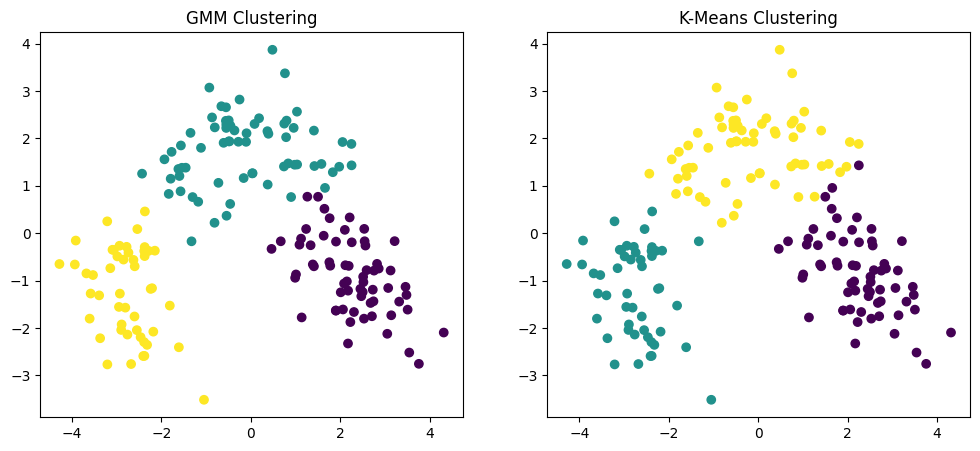

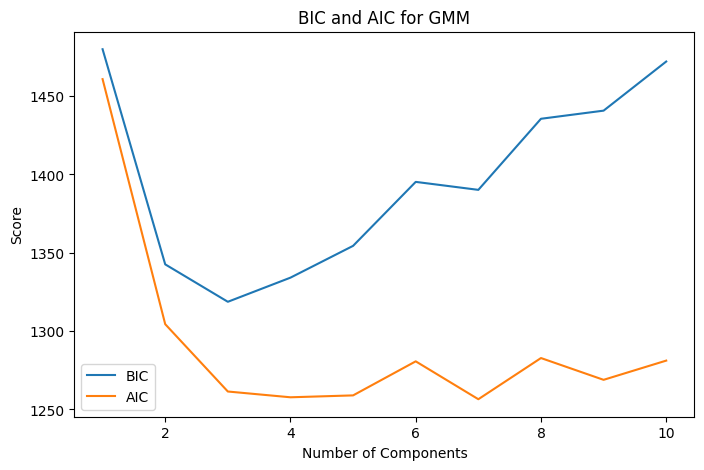

In [117]:
X = wine_data.data
y = wine_data.target

# Standardize the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reduce dataset dimensionality to 2 using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Cluster using GMM and calculate log likelihoods, BIC, and AIC
gmm_instance = GMM_modified()
log_likelihoods, bic, aic = gmm_instance.fit(X_pca, iterations=30, k=3)

# Print log likelihoods, bic, and aic
print('Log Likelihoods:', log_likelihoods)
print('BIC:', bic)
print('AIC:', aic)
gmm_labels = gmm_instance.predict(X_pca)
# Determine optimal number of clusters for GMM_modified using BIC and AIC
n_components_range = range(1, 11)
bic = []
aic = []
for n_components in n_components_range:
    gmm = GMM_modified()
    log_likelihoods, gmm_bic, gmm_aic = gmm.fit(X_pca, iterations=30, k=n_components)
    bic.append(gmm_bic)
    aic.append(gmm_aic)

# Cluster using K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_pca)

# Compute silhouette scores
silhouette_gmm = silhouette_score(X_pca, gmm_labels)
silhouette_kmeans = silhouette_score(X_pca, kmeans_labels)

# Plot scatter plots
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=gmm_labels, cmap='viridis')
plt.title('GMM Clustering')
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('K-Means Clustering')

# Print silhouette scores
print('Silhouette Score (GMM):', silhouette_gmm)
print('Silhouette Score (K-Means):', silhouette_kmeans)

# Print BIC and AIC for GMM
plt.figure(figsize=(8, 5))
plt.plot(n_components_range, bic, label='BIC')
plt.plot(n_components_range, aic, label='AIC')
plt.xlabel('Number of Components')
plt.ylabel('Score')
plt.title('BIC and AIC for GMM')
plt.legend()
plt.show()


### Question 3

In [ ]:
#importing the dataset 
dataset = pd.read_csv('SMAI-Dataset-hc-dataset/new_customers.csv')
dataset['Genre'] = dataset['Genre'].replace({'Male': 0, 'Female': 1})
df = pd.DataFrame(dataset)
numerical_cols = df.columns[1:]
for col in numerical_cols:
    x_min = df[col].min()
    x_max = df[col].max()
    df[col] = (df[col] - x_min) / (x_max - x_min)
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,0.0,0.019231,0.000000,0.387755
1,2,0.0,0.057692,0.000000,0.816327
2,3,1.0,0.038462,0.008197,0.051020
3,4,1.0,0.096154,0.008197,0.775510
4,5,1.0,0.250000,0.016393,0.397959
...,...,...,...,...,...
195,196,1.0,0.326923,0.860656,0.795918
196,197,1.0,0.519231,0.909836,0.275510
197,198,0.0,0.269231,0.909836,0.744898
198,199,0.0,0.269231,1.000000,0.173469


Linkage Type: complete


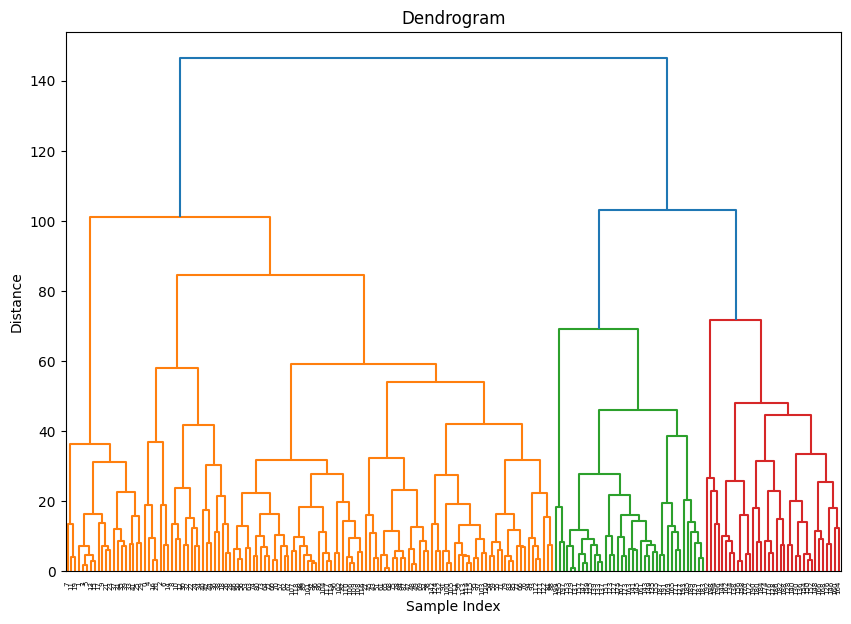

Linkage Type: average


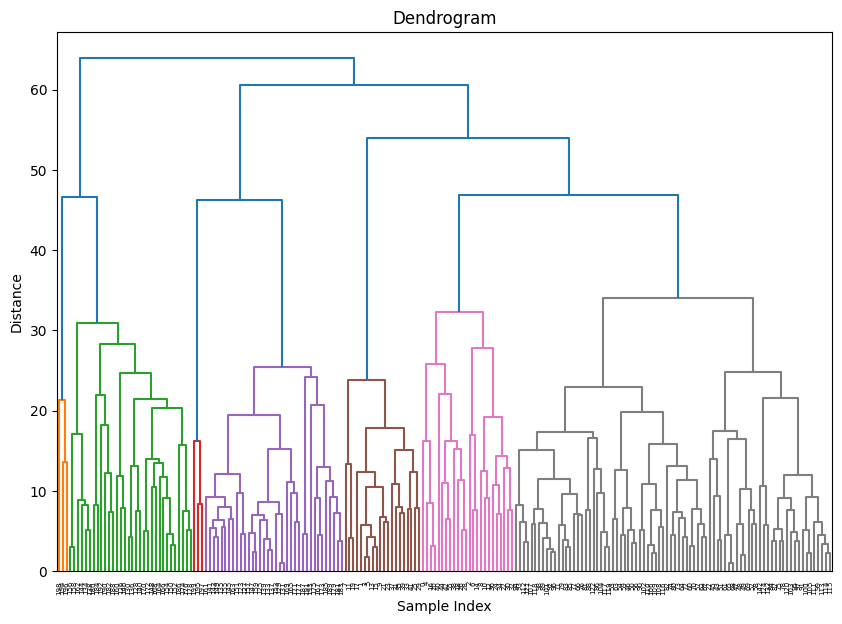

Linkage Type: single


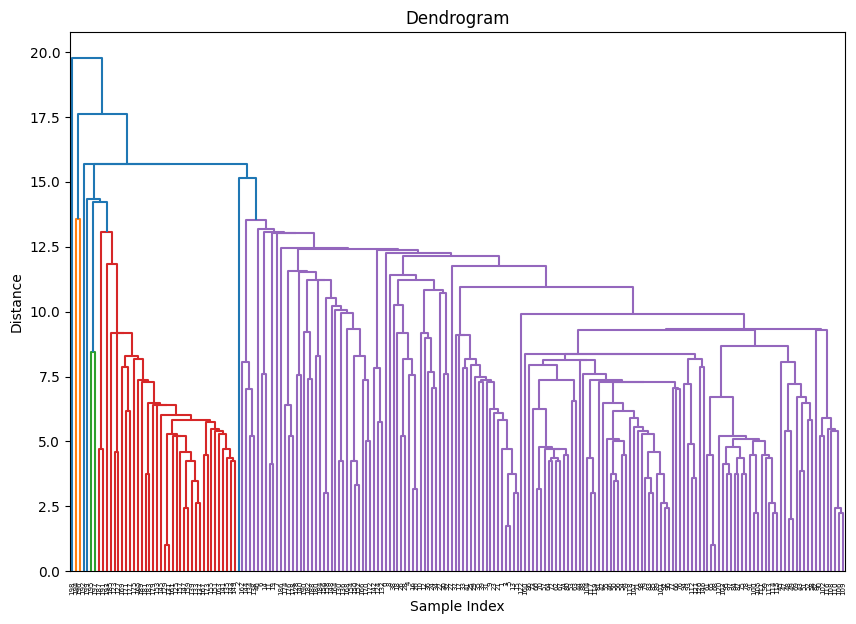

In [ ]:
class HierarchicalClustering:
    def __init__(self, data_path):
        self.data = pd.read_csv(data_path)
        self.data['Genre'] = self.data['Genre'].map({'Male': 0, 'Female': 1})
        self.X = self.data[['Genre','Age', 'Annual Income (k$)', 'Spending Score (1-100)']].values
    def compute_linkage(self, linkage_type):
        return linkage(self.X, linkage_type)

    def plot_dendrogram(self, Z):
        plt.figure(figsize=(10, 7))
        plt.title('Dendrogram')
        dendrogram(Z, leaf_rotation=90)
        plt.xlabel('Sample Index')
        plt.ylabel('Distance')
        plt.show()

    def linkages(self, linkage_types):
        for linkage_type in linkage_types:
            Z = self.compute_linkage(linkage_type)
            print(f'Linkage Type: {linkage_type}')
            self.plot_dendrogram(Z)
if __name__ == "__main__":
    data_path = 'SMAI-Dataset-hc-dataset/new_customers.csv' 
    linkage_types = ['complete', 'average', 'single']

    hc = HierarchicalClustering(data_path)
    hc.linkages(linkage_types)

In [ ]:
gene_dataset = pd.read_csv('SMAI-Dataset-gene-expression/gene.csv')
df = pd.DataFrame(gene_dataset)
numerical_cols = df.columns[1:]
for col in numerical_cols:
    x_min = df[col].min()
    x_max = df[col].max()
    df[col] = (df[col] - x_min) / (x_max - x_min)
df

,ID_REF,GSM613412,GSM613413,GSM613414,GSM613415,GSM613416,GSM613417,GSM613418,GSM613419,GSM613420,GSM613421,GSM613422,GSM613423
0,10338001,0.399439,0.389106,0.415502,0.391386,0.369703,0.377530,0.433792,0.427319,0.441919,0.414324,0.359975,0.416962
1,10338002,0.023194,0.020038,0.027873,0.028230,0.021045,0.022529,0.029076,0.027306,0.026011,0.027563,0.025754,0.034153
2,10338003,0.142329,0.132697,0.145661,0.132960,0.121082,0.129305,0.152903,0.157363,0.162719,0.143351,0.119529,0.146636
3,10338004,0.071389,0.074297,0.072091,0.069635,0.065488,0.067880,0.074323,0.077257,0.079055,0.071336,0.064438,0.076003
4,10338005,0.000403,0.000327,0.000326,0.000229,0.000285,0.000232,0.000145,0.000303,0.000264,0.000268,0.000229,0.000212
5,10338006,0.000722,0.000552,0.000614,0.000442,0.000453,0.000498,0.000635,0.000580,0.000590,0.000584,0.000481,0.000500
6,10338007,0.001619,0.001431,0.001481,0.001315,0.001300,0.001232,0.001504,0.001462,0.001560,0.001434,0.001229,0.001444
7,10338008,0.003756,0.003424,0.003644,0.003930,0.003087,0.003280,0.004239,0.004067,0.003581,0.003779,0.003344,0.004282
8,10338009,0.052132,0.047959,0.070303,0.063192,0.056106,0.059527,0.074344,0.063305,0.061237,0.065046,0.060367,0.073397
9,10338010,0.000435,0.000415,0.000304,0.000315,0.000259,0.000309,0.000248,0.000352,0.000289,0.000386,0.000247,0.000260


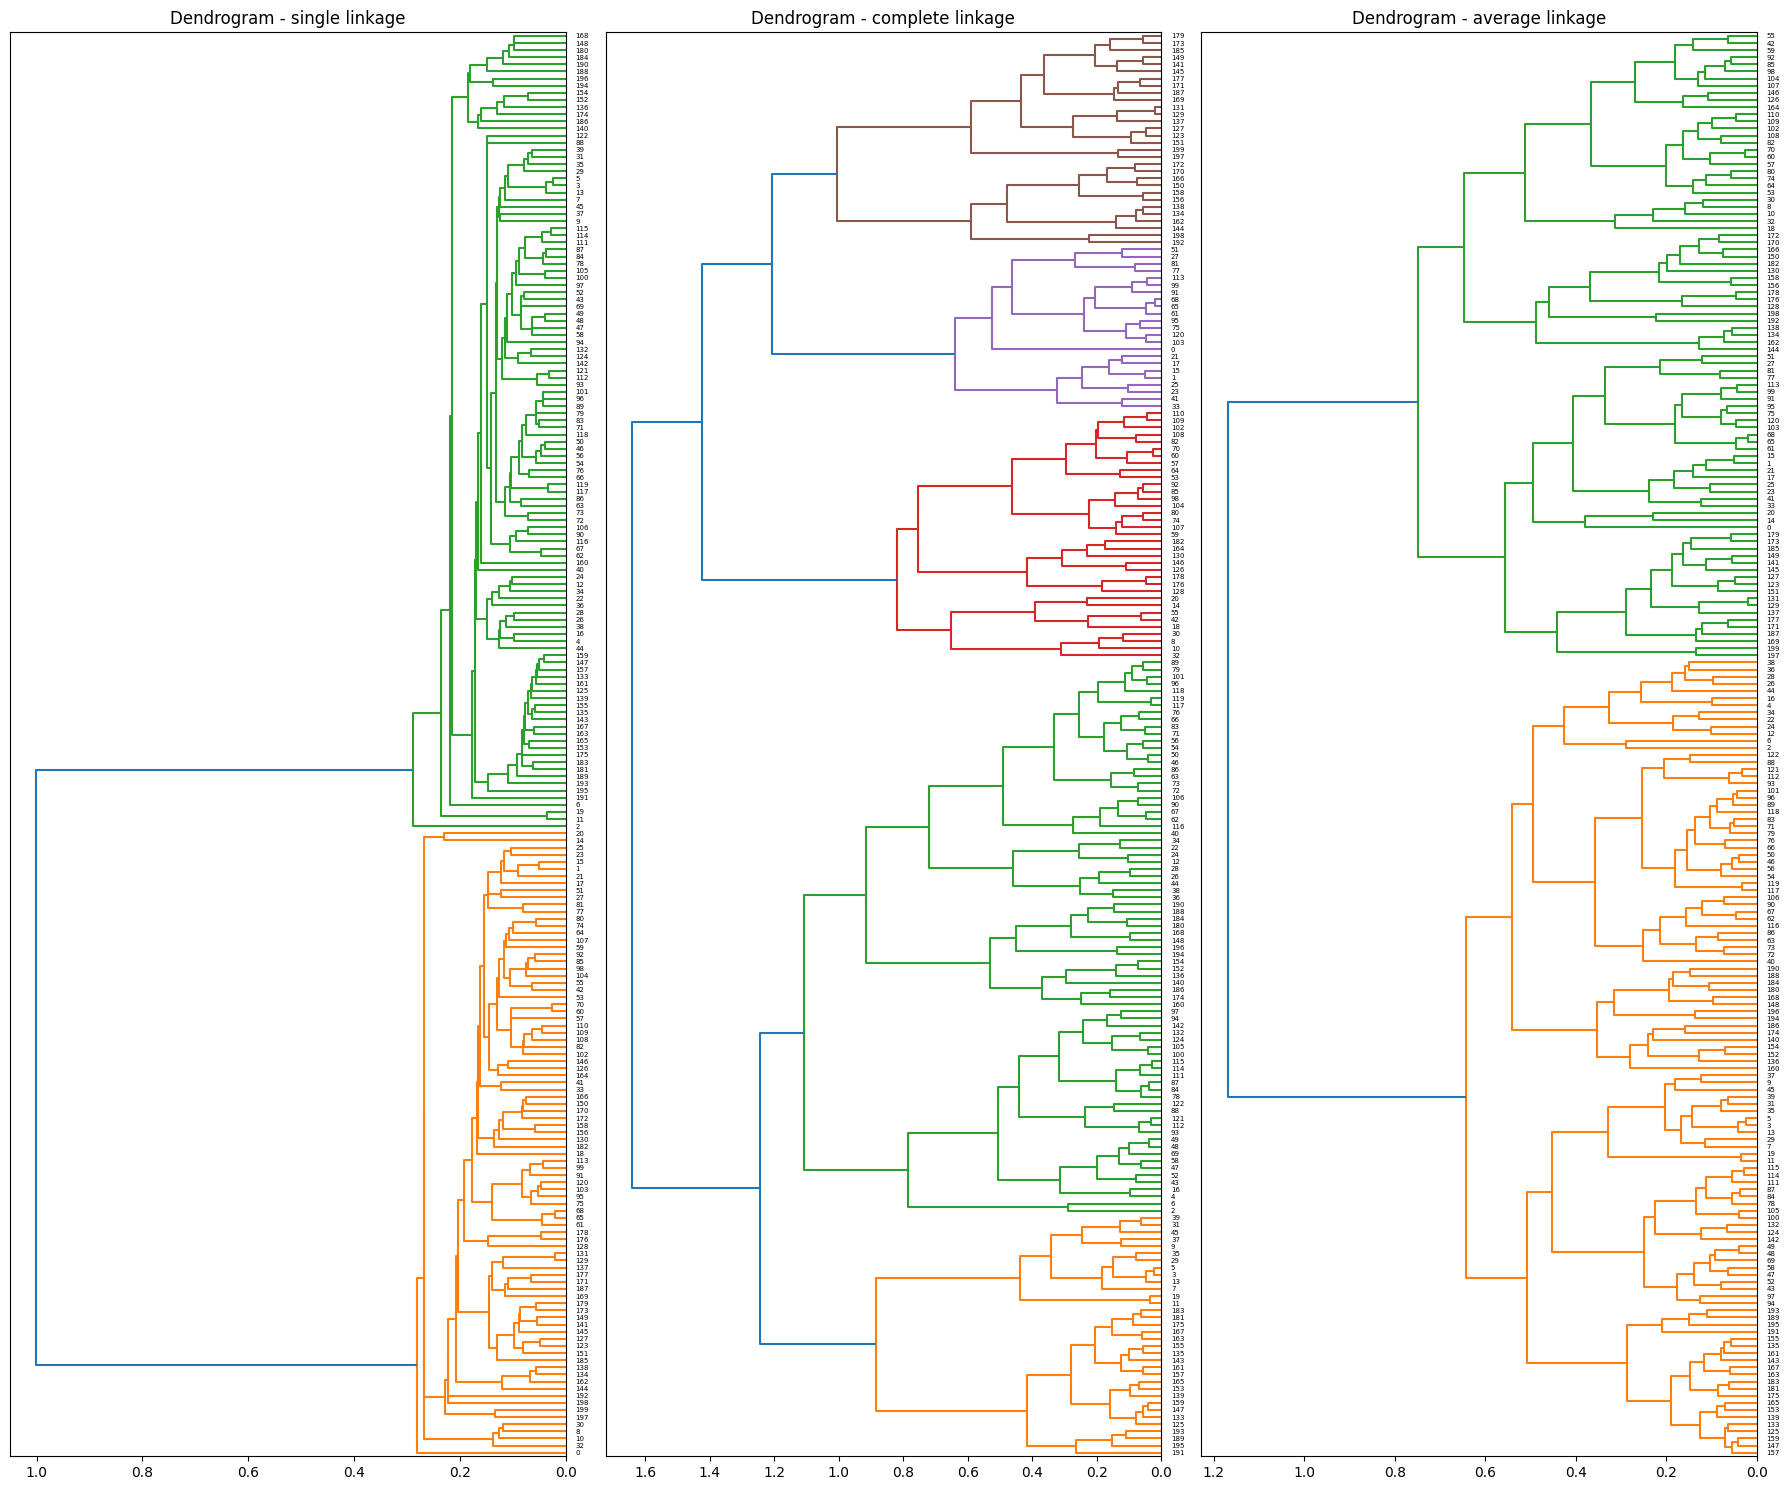

In [ ]:
# features = df.columns[1:]
# X = df[features].values
# linkage_methods = ['single', 'complete', 'average']
# linkage_matrices = {}
# for method in linkage_methods:
#     Z = linkage(X, method)
#     linkage_matrices[method] = Z

# plt.figure(figsize=(18, 15))  
# for i, method in enumerate(linkage_methods, 1):
#     plt.subplot(2, 2, i)
#     plt.title(f'Dendrogram - {method} linkage')
#     dendrogram(linkage_matrices[method], labels=gene_dataset.index, orientation='left')

# plt.tight_layout()
# plt.show()
features = df.columns[1:]
X = df[features].values
linkage_methods = ['single', 'complete', 'average']
linkage_matrices = {}

# Calculate linkage matrices for each method
for method in linkage_methods:
    Z = linkage(X, method)
    linkage_matrices[method] = Z

# Plot dendrograms for each linkage method with a larger size and rotated orientation
plt.figure(figsize=(18, 15))

for i, method in enumerate(linkage_methods, 1):
    plt.subplot(1, 3, i)  # Adjust the subplot layout for 3 dendrograms
    plt.title(f'Dendrogram - {method} linkage')
    dendrogram(linkage_matrices[method], labels=df.index, orientation='left') 

plt.tight_layout()
plt.show()